correct positions entered algo is executing


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


reached
Path is available
[(0, 0), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (50, 0), (100, 50), (0, 50), (100, 50), (0, 50), (50, 0), (0, 50), (100, 50), (0, 50), (50, 0), (0, 50), (100, 50), (0, 50), (100, 50), (0, 50), (50, 0), (0, 50), (100, 50), (0, 50), (100, 50), (0, 50), (100, 50), (0, 50), (100, 50), (0, 50), (0, 50), (100, 0), (100, 100), (50, 100), (100, 50), (0, 50), (100, 50), (0, 50), (50, 0), (0, 50), (100, 50), (0, 50), (50, 0), (0, 50), (100, 50), (0, 50), (100, 50), (0, 50), (50, 0), (0, 50), (100, 50), (0, 50), (50, 0), (0, 50), (100, 100), (50, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100

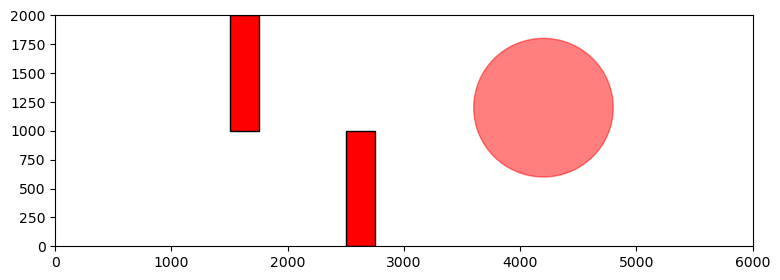

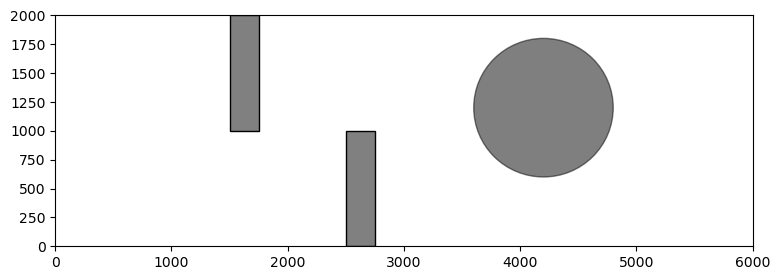

In [1]:
#!/usr/bin/env python
# coding: utf-8


import numpy as np
import cv2
import matplotlib.pyplot as plt
import heapq
import math
from matplotlib.animation import FuncAnimation

'''
First Plotting the Bloated Figure
'''
# step_size = float((input("Enter the step size: ")))
# radius = int(input("Enter the radius of the robot: "))
# cle = int(input("Enter the clearence: "))
step_size = 1
radius = 5
cle = 5
total_clearence = cle + radius

# Coordinates of the first polygon
x1_polygon1, x2_polygon1, y1_polygon1, y2_polygon1 = 1500 - cle , 1750 + cle , 1000 - cle , 2000

# Coordinates of the second polygon
x1_polygon2, x2_polygon2, y1_polygon2, y2_polygon2 = 2500 - cle , 2750 + cle , 0 , 1000 + cle

# Create a blank image with size 1190x490
img_check = np.zeros((2000, 6000 , 3), dtype=np.uint8)

# Define the vertices of the first polygon
pts_polygon1 = np.array([[x1_polygon1, y1_polygon1], [x2_polygon1, y1_polygon1], [x2_polygon1, y2_polygon1], [x1_polygon1, y2_polygon1]], np.int32)
pts_polygon1 = pts_polygon1.reshape((-1, 1, 2))

# Define the vertices of the second polygon
pts_polygon2 = np.array([[x1_polygon2, y1_polygon2], [x2_polygon2, y1_polygon2], [x2_polygon2, y2_polygon2], [x1_polygon2, y2_polygon2]], np.int32)
pts_polygon2 = pts_polygon2.reshape((-1, 1, 2))


# Fill the first polygon with white color
cv2.fillPoly(img_check, [pts_polygon1], (255 , 255 , 255))

# Fill the second polygon with white color
cv2.fillPoly(img_check, [pts_polygon2], (255 , 255 , 255))

# Draw a circle centered at (4200, 1200) with radius 600
circle_center = (4200, 1200)
circle_radius = 600 + cle
cv2.circle(img_check, circle_center, circle_radius, (255, 255, 255), -1)

'''
Now Plotting the Maze on top of the bloated figure
'''

# Coordinates of the first polygon
x1_polygon1, x2_polygon1, y1_polygon1, y2_polygon1 = 1500 , 1750 , 1000 , 2000
1500, 
# Coordinates of the second polygon
x1_polygon2, x2_polygon2, y1_polygon2, y2_polygon2 = 2500, 2750, 0, 1000

# Create a blank image with size 1190x490
img_ori = np.zeros((2000, 6000 ,3), dtype=np.uint8)

# Define the vertices of the first polygon
pts_polygon1 = np.array([[x1_polygon1, y1_polygon1], [x2_polygon1, y1_polygon1], [x2_polygon1, y2_polygon1], [x1_polygon1, y2_polygon1]], np.int32)
pts_polygon1 = pts_polygon1.reshape((-1, 1, 2))

# Define the vertices of the second polygon
pts_polygon2 = np.array([[x1_polygon2, y1_polygon2], [x2_polygon2, y1_polygon2], [x2_polygon2, y2_polygon2], [x1_polygon2, y2_polygon2]], np.int32)
pts_polygon2 = pts_polygon2.reshape((-1, 1, 2))

# Fill the first polygon with white color
cv2.fillPoly(img_ori, [pts_polygon1], (255 , 255 , 255))

# Fill the second polygon with white color
cv2.fillPoly(img_ori, [pts_polygon2], (255 , 255 , 255))

# Draw a circle centered at (4200, 1200) with radius 600
circle_center = (4200, 1200)
circle_radius = 600
cv2.circle(img_ori, circle_center, circle_radius, (255 , 255, 255), -1)

# def possible_moves(tup , step_size):
#     x_old, y_old, theta_old = tup
#     move_list = []
#     angles = [0, 30, 60, -30, -60]

#     for angle in angles:
#         theta = (theta_old + angle)
#         if (theta == 0):
#             theta = 0
#         elif (theta == 360):
#             theta = 360
#         else :
#             theta = theta % 360
#         x = x_old + step_size * math.cos(np.radians(theta))
#         y = y_old + step_size * math.sin(np.radians(theta))  # Use sin for y-coordinate
#         move_list.append((x, y, theta))

#     return move_list

def possible_moves(tup , step_size, RPM1, RPM2):
    Xi, Yi, Thetai = tup
    RPM1 = 50
    RPM2 = 100
    move_list = [(0, RPM1), (RPM1, 0), (RPM1, RPM1), (0, RPM2), (RPM2, 0), (RPM2, RPM2), (RPM1, RPM2), (RPM2, RPM1)]

    moves = []
    
    for move in move_list:
        UL,UR= move
        #t = 0
        r = 0.038
        L = 0.354
        dt = 10
        # Xn=Xi
        # Yn=Yi
#       Thetan = 3.14 * Thetai / 180

    # Xi, Yi,Thetai: Input point's coordinates
    # Xs, Ys: Start point coordinates for plot function
    # Xn, Yn, Thetan: End point coordintes

        #D=0
        #t = t + dt
        # Xs = Xn
        # Ys = Yn
        Thetan = Thetai + (r / L) * (UR - UL) * dt
        if (Thetan == 0):
            Thetan = 0
        elif (Thetan == 360):
            Thetan = 360
        else :
            Thetan = Thetan % 360
        Xn = Xi + 0.5*r * (UL + UR) * np.cos(np.radians(Thetan)) * dt
        Yn = Yi +  0.5*r * (UL + UR) * np.sin(np.radians(Thetan)) * dt
#         Thetan = 180 * (Thetan) / 3.14
        # plt.plot([Xs, Xn], [Ys, Yn], color="blue")

           
        moves.append((Xn,Yn, Thetan, UL, UR))


    return moves

def is_in_check(tup , visited):
    x , y , theta = tup
    if ((x , y)) in visited :
            thetas = visited[x, y]
            for theta_c in thetas:
                if abs(theta_c - theta) < 30:
                    return True
    return False
    
    
    
def is_move_legal(tup , img_check, total_clearence):
    x , y = tup
    #pixel_value = img_check[y, x]
#     pixel_value = tuple(pixel_value)
    if x < total_clearence  or x >= (6000 - total_clearence) or y < total_clearence or y >= (2000 - total_clearence):
        return False
    elif tuple(img_check[int(round(y)), int(round(x))]) == (255 , 255 , 255) :
        #print(f"Point {point} is in the free region.(here 6)")
        return False
    else :
        return True

def algorithm(start , goal, step_size, image, total_clearence) :
    #Please note that in the line that follows you will need to change the video driver to an 
    #appropriate one that is available on your system.
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    ##Please change the path to the desired path.
    out = cv2.VideoWriter(r'Downloads\test.mp4', fourcc, 20, (6000, 2000))
    
    x_start , y_start , theta_start = start
    
    x_goal , y_goal , theta_goal = goal
    
    h = math.sqrt((x_start - x_goal)**2 + (y_start - y_goal)**2)
    
    queue_open =  [(h , (start , 0))]

    heapq.heapify(queue_open)

    visited = {}
    visited_parent = {}
    path = []
    info_dict = {start : ((None , None) , 0 , 0 , 0)}
    # frame_list = []
    ite = 0
    move_list = []
    reached = 0
    velocity_list = []
    while queue_open :
        element = heapq.heappop(queue_open)
        t_c , tup = element
        node , c_2_c = tup
#         print(node)
        info = info_dict[node]
        parent , c_2_c_p, UL, UR = info
        visited_parent[node] = (parent , UL , UR)
        x , y , theta = node
        theta = theta % 360
        x_int = int(round(x))
        y_int = int(round(y))
        #node = (x_int , y_int , theta)
        #figure out where exactly to store the theta value
        if (x_int , y_int) in visited :
            thetas = visited[x_int , y_int]
            thetas.append(theta)
        else:
            thetas = []
            thetas.append(theta)
            visited[x_int , y_int] = thetas
#         visited_parent[node] = parent
        if (math.sqrt((node[0] - goal[0])**2 + (node[1] - goal[1])**2) <= 1.5)  :
            #print(reached)
            path.append(node)
            #velocity_list = []
            while node != start :
                parent , UL , UR = visited_parent[node]
                velocity_list.append((UL , UR))
                path.append(parent)
                node = parent
            velocity_list.append((0 , 0))
            path.reverse()
            velocity_list.reverse()
            #print(path)
            for point in (path) :
                x, y, theta = point
                x_int = int(round(x))
                y_int = int(round(y))
                cv2.circle(img_ori , (x_int , y_int) , 1 , (0 , 255 , 0) , -1)
            print('reached')
            img_ori_copy = img_ori.copy()
            flipped_vertical = cv2.flip(img_ori_copy, 0)
            for i in range (100):
                out.write(flipped_vertical)
            reached = 1
            break

        moves = possible_moves((x_int , y_int , theta) , step_size, RPM1, RPM2)
        for m_v in (moves) :
            x , y, theta, UL, UR = m_v
            move = (x , y ,theta)
            x_int = int(round(x))
            y_int = int(round(y))
            Bool1 = is_move_legal((x_int , y_int) , image, total_clearence)
            #move = (x_int , y_int , theta)
            if (Bool1 == True):
                #print(move)
                Bool2 = is_in_check((x_int , y_int , theta) , visited)
                if (Bool2 == False):
                    cv2.circle(img_ori , (x_int , y_int) , 1 , (255 , 0 , 0) , -1)
                    move_list.append((move[0] , move[1]))
                    if (ite % 10000) == 0 :
                            img_ori_copy = img_ori.copy()
                            flipped_vertical = cv2.flip(img_ori_copy, 0)
                            out.write(flipped_vertical)
                    if move in info_dict :
                        info = info_dict[move]
                        parent , c_2_c_p, UL_p , UR_p = info
                        c_2_c_n = c_2_c + 1
                        if (c_2_c_n < c_2_c_p):
                            #total cost calculation
                            total_cost = c_2_c_n + math.sqrt((move[0] - goal[0]) ** 2 + (move[1] - goal[1]) ** 2)
                            info_dict[move] = (node , c_2_c_n, UL, UR)
                            queue_open = [(k, v) for k, v in queue_open if v[0] != move]
                            heapq.heapify(queue_open)
                            heapq.heappush(queue_open , (total_cost , (move , c_2_c_n)))
                    elif move not in info_dict :
                        total_cost = (c_2_c + 1) + math.sqrt((move[0] - goal[0]) ** 2 + (move[1] - goal[1]) ** 2)
                        info_dict[move] = (node , c_2_c + 1,  UL, UR)
                        heapq.heappush(queue_open , (total_cost , (move , c_2_c + 1)))
        ite += 1

    out.release()
    return visited_parent, reached, path, move_list, velocity_list

'''
Function to plot all the Visited Nodes
'''
def animate_search(visited, circle_center):
    fig, ax = plt.subplots(figsize=(9, 3)) #set animate to 12:5 match map shape
    ax.set_xlim(0, 6000) #set animate x axis
    ax.set_ylim(0, 2000) #set animate y axis

    #show obstacles
    for polygons in obstacles:
        polygon = plt.Polygon(polygons, facecolor="red", edgecolor='black')
        ax.add_patch(polygon)

    # Draw circle
    circle = plt.Circle(circle_center, radius=600, color='red', alpha=0.5)  # Adjust radius as needed
    ax.add_artist(circle)

    points = ax.scatter([], [], s=1, color='blue') 

    def init():
        points.set_offsets(np.empty((0, 2))) 
        return points,

    def update(frame):
        skip = 50000 #set flames skip
        frame *= skip 
        visited_points = np.array(visited[:frame+1])
        points.set_offsets(visited_points)
        return points,

    ani = FuncAnimation(fig, update, frames=len(visited), init_func=init, blit=True, interval=1)
    plt.show()

'''
Animate the path
'''
def animate_path(path, circle_center):
    fig, ax = plt.subplots(figsize=(9,3))
    ax.set_xlim(0, 6000)
    ax.set_ylim(0, 2000)

    for polygons in obstacles:
        polygon = plt.Polygon(polygons, facecolor="gray", edgecolor='black')
        ax.add_patch(polygon)

    # Draw circle
    circle = plt.Circle(circle_center, radius=600, color='black', alpha=0.5)  # Adjust radius as needed
    ax.add_artist(circle)

    line, = ax.plot([], [], 'b-', lw=2)  # Path line

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        skip = 20 #set flames skip
        frame *= skip
        x, y = zip(*path[:frame+1]) #get path
        line.set_data(x, y)
        return line,

    ani = FuncAnimation(fig, update, frames=len(path), init_func=init, blit=True, interval=50)
    plt.show()

obstacles = [
    [(1500, 1000), (1500, 2000), (1750, 2000), (1750, 1000)],

    [(2500, 0), (2500, 1000), (2750, 1000), (2750, 0)]
]


circle_center = (4200, 1200)

# start_x = float(input("Enter the start x position: "))
# start_x = int(round(start_x))
# start_y = float(input("Enter the start y position: "))
# start_y = int(round(start_y))
# start_theta = int(input("Enter the start orientation: "))
# goal_x = float(input("Enter the goal x position: "))
# goal_x = int(round(goal_x))
# goal_y = float(input("Enter the goal y position: "))
# goal_y = int(round(goal_y))
# goal_theta = int(input("Enter the goal orientation: "))

start_x = 500
start_y = 1750
start_theta = 0
# goal_x = 4000
# goal_y = 1780
goal_x = 5750
goal_y = 1000
RPM1 = 500
RPM2 = 1000
goal_theta = start_theta

start = (start_x , start_y, start_theta)
goal = (goal_x , goal_y, goal_theta)
Bool1 = is_move_legal((start[0] , start[1]) , img_check, total_clearence)
Bool2 = is_move_legal((goal[0] , goal[1]) , img_check, total_clearence)

if Bool1 == True and Bool2 == True :
    print('correct positions entered algo is executing')
    visited_parent , reached, path, move_list, velocity_list = algorithm (start , goal, step_size, img_check, total_clearence)
    if reached == 1 :
        print('Path is available')
    else  :
        print('Did not reach')
else :
    print('please run the code cell again and enter valid start and goal positions')


'''
Storing all the path coordinates in a list
'''
node = path[0]
while node != start :
    parent = visited_parent[node]
    path.append(parent)
    node = parent
# path.reverse()
#print(path)
print(velocity_list)
coord_list = []
for point in path :
    x , y , theta = point
    coord_list.append((x , y))

circle_center = (4200, 1200)

animate_search(move_list, circle_center)

animate_path(coord_list, circle_center)